In [ ]:
#特徴量抽出　ＦＩＬＴＥＲ法

#データをトレーニング・テストに分けるモジュール
from sklearn.model_selection import train_test_split
#ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
#正答率算出
from sklearn.metrics import accuracy_score
#category encoder インポート
import category_encoders as ce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#データ 読み込み
df_adult = pd.read_csv('adult.data', header=None)
#変数名付与
df_adult.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum", "MaritalStatus",
    "Occupation", "Relationship", "Race", "Gender", "CapitalGain",
    "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

#ターゲット変数1/0エンコーディング
df_adult['Income'] = (df_adult['Income'] == ' >50K').astype(int)
#特徴量取得
X_adult = df_adult.drop(['Income'], axis=1)
#ターゲット変数を取得
y_adult = df_adult['Income']
#訓練・検証データを分離
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(
    X_adult, y_adult, test_size=0.2, random_state=1)

#ターゲットエンコーダ インスタンス化
encoder = ce.TargetEncoder(cols=['Education', 'Occupation', 'NativeCountry'])
enc = encoder.fit(X_adult_train, y_adult_train)
X_adult_train = enc.transform(X_adult_train)
X_adult_test = enc.transform(X_adult_test)

#One-Hotエンコーディング インスタンス化
encoder = ce.OneHotEncoder(
    cols=['WorkClass', 'MaritalStatus', 'Relationship', 'Race', 'Gender'],
    use_cat_names=True)
enc = encoder.fit(X_adult_train)
X_adult_train = enc.transform(X_adult_train)
X_adult_test = enc.transform(X_adult_test)

#One-Hotエンコーディングで冗長になった変数を落とす
drop_l = [
    [col for col in X_adult_train.columns if col.find('WorkClass') >= 0][0], [
        col for col in X_adult_train.columns if col.find('MaritalStatus') >= 0
    ][0], [
        col for col in X_adult_train.columns if col.find('Relationship') >= 0
    ][0], [col for col in X_adult_train.columns if col.find('Race') >= 0][0],
    [col for col in X_adult_train.columns if col.find('Gender') >= 0][0]
]
X_adult_train = X_adult_train.drop(drop_l, axis=1)
X_adult_test = X_adult_test.drop(drop_l, axis=1)

In [2]:
#すべての特徴量
features_all = X_adult_train.columns
print('特徴量 : {} '.format(features_all))
#比較用として全ての特徴量でモデル作成
#フルモデルと比較
reg = LogisticRegression().fit(X_adult_train, y_adult_train)
score_all = accuracy_score(y_adult_test, reg.predict(X_adult_test))
print('訓練 : {} '.format(
    accuracy_score(y_adult_train, reg.predict(X_adult_train))))
print('検証 : {} '.format(
    accuracy_score(y_adult_test, reg.predict(X_adult_test))))

特徴量 : Index(['Age', 'WorkClass_ Private', 'WorkClass_ State-gov', 'WorkClass_ ?',
       'WorkClass_ Federal-gov', 'WorkClass_ Local-gov',
       'WorkClass_ Self-emp-inc', 'WorkClass_ Never-worked',
       'WorkClass_ Without-pay', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus_ Never-married', 'MaritalStatus_ Divorced',
       'MaritalStatus_ Widowed', 'MaritalStatus_ Married-spouse-absent',
       'MaritalStatus_ Separated', 'MaritalStatus_ Married-AF-spouse',
       'Occupation', 'Relationship_ Not-in-family',
       'Relationship_ Other-relative', 'Relationship_ Unmarried',
       'Relationship_ Own-child', 'Relationship_ Wife', 'Race_ Black',
       'Race_ Asian-Pac-Islander', 'Race_ Other', 'Race_ Amer-Indian-Eskimo',
       'Gender_ Female', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek',
       'NativeCountry'],
      dtype='object') 
訓練 : 0.7950322481572482 
検証 : 0.8066943037002917 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Text(0.5, 1.0, 'Feature selection by using F value')

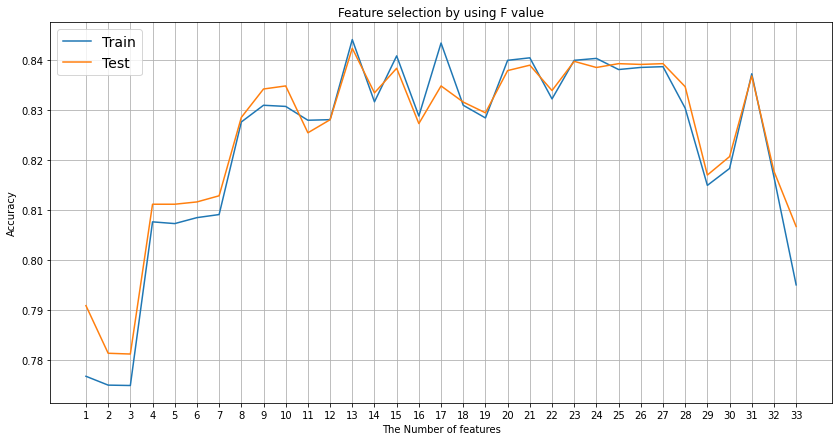

In [3]:
#単変量Filterモジュール読み込む
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2
#F値でfeature selection filter法
tr_score = []  #訓練スコアを入れるリスト
te_score = []  #検証スコアを入れるリスト
features = []  #特徴量を入れるりスト
#Kごとに精度評価
for i in np.arange(len(X_adult_train.columns)):
    sel = SelectKBest(f_classif, k=i + 1).fit(X_adult_train, y_adult_train)
    X_train_sel = sel.transform(X_adult_train)
    X_test_sel = sel.transform(X_adult_test)
    reg = LogisticRegression().fit(X_train_sel, y_adult_train)
    tr_score.append(accuracy_score(y_adult_train, reg.predict(X_train_sel)))
    te_score.append(accuracy_score(y_adult_test, reg.predict(X_test_sel)))
    features.append(X_adult_train.columns[sel.get_support()])

#kごとに精度がどのように変わったか可視化する
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(X_adult_train.columns)) + 1, tr_score, label='Train')
plt.plot(np.arange(len(X_adult_train.columns)) + 1, te_score, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('The Number of features')
plt.xticks(np.arange(1, 1 + len(X_adult_train.columns)))
plt.legend(fontsize=14)
plt.grid()
plt.title('Feature selection by using F value')

In [14]:
#訓練データの精度最大となるk
print (tr_score.index(np.max(tr_score)))

12


In [15]:
#訓練データで精度最大になる変数の数と組み合わせ
features_sel_filter = features[tr_score.index(np.max(tr_score))]
print ('特徴量 : {} '.format(features_sel_filter))
print ('訓練 : {} '.format((tr_score[tr_score.index(np.max(tr_score))])))
print ('検証 : {} '.format((te_score[tr_score.index(np.max(tr_score))])))

特徴量 : Index(['Age', 'WorkClass_ Self-emp-inc', 'Education', 'EducationNum',
       'MaritalStatus_ Never-married', 'Occupation',
       'Relationship_ Not-in-family', 'Relationship_ Unmarried',
       'Relationship_ Own-child', 'Gender_ Female', 'CapitalGain',
       'CapitalLoss', 'HoursPerWeek'],
      dtype='object') 
訓練 : 0.8440571253071253 
検証 : 0.8423153692614771 


Wrapper方法の検証


In [17]:
!pip install -U mlxtend

In [18]:
#wrapper法実行モジュール読み込む
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [23]:
#SFSインスタンス化
sfs = SFS(LogisticRegression(),  #利用するモデル
           k_features=(1,33), #特徴量の数 1-33個の間でCVスコアベストを探す
           forward=True, #フォワード型
           floating=False, #フローティングの有無
           verbose=2,
           scoring='accuracy',#精度指標
           cv=5,
          n_jobs=-1)

sfs = sfs.fit(X_adult_train, y_adult_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    4.8s finished

[2021-08-01 12:24:43] Features: 1/33 -- score: 0.7969134699318948[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    4.9s finished

[2021-08-01 12:24:48] Features: 2/33 -- score: 0.8104267713233666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    6.9s finished

[2021-08-01 12:24:55] Features: 3/33 -- score: 0.8114633796739661[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished

[2021-08-01 12:25:05] Features: 4/33 -- score: 0.8116939344239945[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   14.0s finished



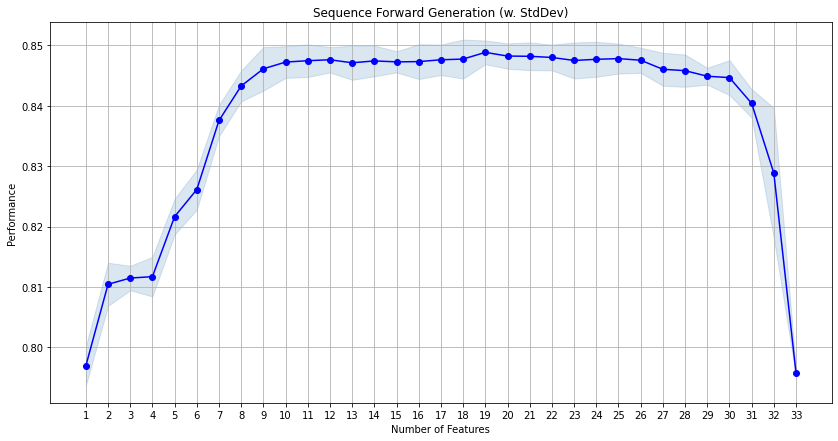

In [24]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize=(14, 7))
plt.title('Sequence Forward Generation (w. StdDev)')
plt.grid()

In [25]:
#選ばれた特徴量のサブセットでモデルを作成
features_sel_wrapper_sfg = list(sfs.k_feature_names_)
reg = LogisticRegression().fit(X_adult_train[features_sel_wrapper_sfg],
                               y_adult_train)
print('特徴量 : {} '.format(features_sel_wrapper_sfg))
print('訓練 : {} '.format(
    accuracy_score(y_adult_train,
                   reg.predict(X_adult_train[features_sel_wrapper_sfg]))))
print('検証 : {} '.format(
    accuracy_score(y_adult_test,
                   reg.predict(X_adult_test[features_sel_wrapper_sfg]))))
score_sel_wrapper_sfg = accuracy_score(
    y_adult_test, reg.predict(X_adult_test[features_sel_wrapper_sfg]))

特徴量 : ['WorkClass_ State-gov', 'WorkClass_ ?', 'WorkClass_ Federal-gov', 'WorkClass_ Self-emp-inc', 'WorkClass_ Never-worked', 'WorkClass_ Without-pay', 'Education', 'EducationNum', 'MaritalStatus_ Divorced', 'Occupation', 'Relationship_ Not-in-family', 'Relationship_ Other-relative', 'Relationship_ Unmarried', 'Relationship_ Own-child', 'Relationship_ Wife', 'Race_ Other', 'Race_ Amer-Indian-Eskimo', 'CapitalGain', 'CapitalLoss'] 
訓練 : 0.8473587223587223 
検証 : 0.8478427759864886 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
#SFSインスタンス化
sfsf = SFS(
    LogisticRegression(),  #利用するモデル
    k_features=(1, 33),  #特徴量の数 1-33個の間でCVスコアベストを探す
    forward=True,  #フォワード型
    floating=True,  #フローティングの有無 Trueとする
    verbose=2,
    scoring='accuracy',  #精度指標
    cv=5,
    n_jobs=-1)

sfsf = sfsf.fit(X_adult_train, y_adult_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.4s finished

[2021-08-01 12:33:24] Features: 1/33 -- score: 0.7969134699318948[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2021-08-01 12:33:29] Features: 2/33 -- score: 0.8104267713233666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2021-08-01 12:33:35] Features: 3/33 -- score: 0.81

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   16.7s finished

[2021-08-01 12:42:44] Features: 17/33 -- score: 0.8478961519796867[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   20.6s finished

[2021-08-01 12:43:21] Features: 18/33 -- score: 0.8474354109545379[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   18.2s finished

[2021-08-01 12:44:26] Features: 18/33 -- score: 0.848318438

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   32.8s finished

[2021-08-01 13:00:09] Features: 28/33 -- score: 0.8463222924740105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   35.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   44.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   32.3s finished

[2021-08-01 13:02:08] Features: 27/33 -- score: 0.8477810035708904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elaps

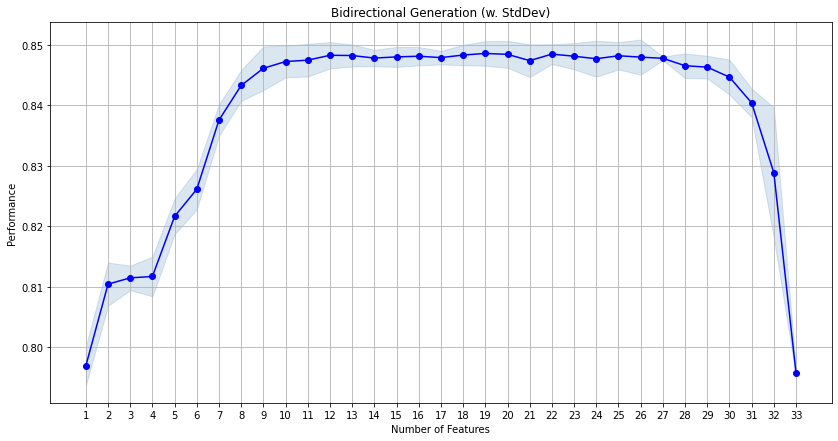

In [28]:
fig1 = plot_sfs(sfsf.get_metric_dict(), kind='std_dev', figsize=(14, 7))
plt.title('Bidirectional Generation (w. StdDev)')
plt.grid()

In [29]:
#選ばれた特徴量のサブセットでモデルを作成
features_sel_wrapper_bg = list(sfsf.k_feature_names_)
reg = LogisticRegression().fit(X_adult_train[features_sel_wrapper_bg],
                               y_adult_train)
print('特徴量 : {} '.format(features_sel_wrapper_bg))
print('訓練 : {} '.format(
    accuracy_score(y_adult_train,
                   reg.predict(X_adult_train[features_sel_wrapper_bg]))))
print('検証 : {} '.format(
    accuracy_score(y_adult_test,
                   reg.predict(X_adult_test[features_sel_wrapper_bg]))))
score_sel_wrapper_bg = accuracy_score(
    y_adult_test, reg.predict(X_adult_test[features_sel_wrapper_bg]))

特徴量 : ['WorkClass_ State-gov', 'WorkClass_ ?', 'WorkClass_ Federal-gov', 'WorkClass_ Local-gov', 'WorkClass_ Self-emp-inc', 'WorkClass_ Never-worked', 'WorkClass_ Without-pay', 'EducationNum', 'MaritalStatus_ Married-spouse-absent', 'MaritalStatus_ Separated', 'Occupation', 'Relationship_ Not-in-family', 'Relationship_ Other-relative', 'Relationship_ Unmarried', 'Relationship_ Own-child', 'Race_ Other', 'Race_ Amer-Indian-Eskimo', 'CapitalGain', 'CapitalLoss'] 
訓練 : 0.8485488329238329 
検証 : 0.8466144633809305 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
#SelectFromModelモジュール読み込み
from sklearn.feature_selection import SelectFromModel
#標準化モジュール読み込む
from sklearn.preprocessing import StandardScaler

In [31]:
#標準化
scaler = StandardScaler()
scaler.fit(X_adult_train)
X_adult_train_standard = scaler.transform(X_adult_train)
X_adult_test_standard = scaler.transform(X_adult_test)

In [32]:
#lasso selectFromModelインスタンス作成
embeded_selector = SelectFromModel(
    LogisticRegression(C=1.0, penalty="l1", solver='liblinear'),
    threshold='mean')
embeded_selector.fit(X_adult_train_standard, y_adult_train)

SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
                threshold='mean')

In [33]:
#選ばれた特徴量のサブセットでモデルを作成
features_sel_embedded_lasso = X_adult_train.columns[
    embeded_selector.get_support()]
reg = LogisticRegression()
#モデル作成
reg.fit(embeded_selector.transform(X_adult_train), y_adult_train)
print('特徴量 : {} '.format(features_sel_embedded_lasso))
print('訓練 : {} '.format(
    accuracy_score(y_adult_train,
                   reg.predict(embeded_selector.transform(X_adult_train)))))
print('検証 : {} '.format(
    accuracy_score(y_adult_test,
                   reg.predict(embeded_selector.transform(X_adult_test)))))
score_sel_embedded_lasso = accuracy_score(
    y_adult_test, reg.predict(embeded_selector.transform(X_adult_test)))

特徴量 : Index(['Age', 'EducationNum', 'MaritalStatus_ Never-married',
       'MaritalStatus_ Divorced', 'MaritalStatus_ Separated', 'Occupation',
       'Relationship_ Own-child', 'Relationship_ Wife', 'Gender_ Female',
       'CapitalGain', 'HoursPerWeek'],
      dtype='object') 
訓練 : 0.8371084152334153 
検証 : 0.8321817902656226 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
#RaondomForest
from sklearn.ensemble import RandomForestClassifier

#RondomForest SelectFromModelインスタンス作成
embeded_selector = SelectFromModel(
    RandomForestClassifier(
        n_estimators=100, random_state=0, min_samples_leaf=50), "mean")
embeded_selector.fit(X_adult_train, y_adult_train)

#選ばれた特徴量のサブセットでモデルを作成
features_sel_embedded_rf = X_adult_train.columns[
    embeded_selector.get_support()]
reg = LogisticRegression()
#モデル作成
reg.fit(embeded_selector.transform(X_adult_train), y_adult_train)
print('特徴量 : {} '.format(features_sel_embedded_rf))
print('訓練 : {} '.format(
    accuracy_score(y_adult_train,
                   reg.predict(embeded_selector.transform(X_adult_train)))))
print('検証 : {} '.format(
    accuracy_score(y_adult_test,
                   reg.predict(embeded_selector.transform(X_adult_test)))))
score_sel_embedded_rf = accuracy_score(
    y_adult_test, reg.predict(embeded_selector.transform(X_adult_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=mean as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


特徴量 : Index(['Age', 'Education', 'EducationNum', 'MaritalStatus_ Never-married',
       'MaritalStatus_ Divorced', 'Occupation', 'Relationship_ Not-in-family',
       'Gender_ Female', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek'],
      dtype='object') 
訓練 : 0.8215985872235873 
検証 : 0.8229694457239367 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
